In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-ind is already the newest version (4.00~git24-0e00fe6-1.2).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [ ]:
  def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [ ]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import dlib
from skimage import io

In [ ]:
pip install Pillow==9.0.0 #to avoid resampling error

€) BANNARI AMMAN
sama INSTITUTE OF TECHNOLOGY

    

KOKILA M

eYLG IS
B.Tech. - csBs

"Aa ha
PRINCIPAL



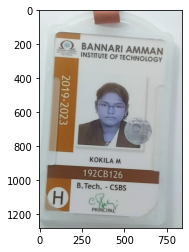

In [ ]:
img = cv2.imread("/content/Kokila M_College ID.jpeg")
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

In [ ]:
pd.set_option('max_columns', None)
pd.set_option('display.max_rows', text.shape[0]+1)

In [ ]:
print("text1 : \n")
print(text1,"\n\n")

print("text : \n")
print(text, "\n\n")
  
print("lines : \n")
for i in range(len(lines)):
  print("level", i, ": ", lines.iloc[i])

print("\n\n conf : \n")
print(conf)

text1 : 

    level  page_num  block_num  par_num  line_num  word_num  left   top  \
0       1         1          0        0         0         0     0     0   
1       2         1          1        0         0         0   117   180   
2       3         1          1        1         0         0    99   180   
3       4         1          1        1         1         0   117   180   
4       5         1          1        1         1         1   117   180   
..    ...       ...        ...      ...       ...       ...   ...   ...   
31      4         1          5        1         1         0   355  1124   
32      5         1          5        1         1         1   355  1135   
33      5         1          5        1         1         2   402  1124   
34      4         1          5        1         2         0   312  1162   
35      5         1          5        1         2         1   312  1162   

    width  height  conf       text  
0     838    1280    -1        NaN  
1     607     1

In [ ]:
from pytesseract import Output

img = cv2.imread('Kokila M_College ID.jpeg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


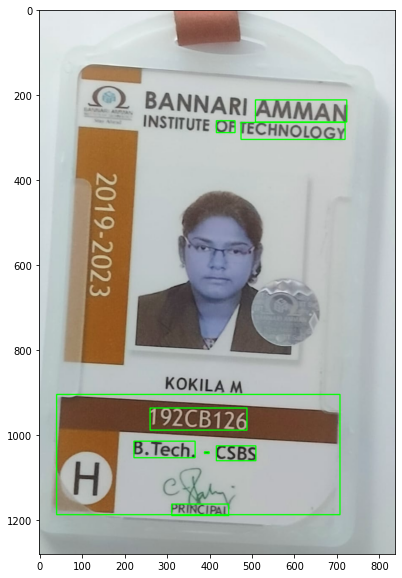

In [ ]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 60:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(img)

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [ ]:
def detect_faces(image):
    face_detector = dlib.get_frontal_face_detector()
    detected_faces = face_detector(image, 1)
    face_frames = [(x.left(), x.top(),
                    x.right(), x.bottom()) for x in detected_faces]

    return face_frames


In [ ]:
img_path = '/content/Kokila M_College ID.jpeg'
image = io.imread(img_path)

detected_faces = detect_faces(image)

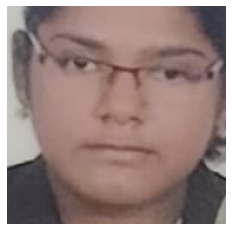

In [ ]:
for n, face_rect in enumerate(detected_faces):
    face = Image.fromarray(image).crop(face_rect)
    plt.subplot(1, len(detected_faces), n+1)
    plt.axis('off')
    plt.imshow(face)

In [ ]:
img_path = '/content/aadhar card.jpeg'
image = io.imread(img_path)

detected_faces = detect_faces(image)

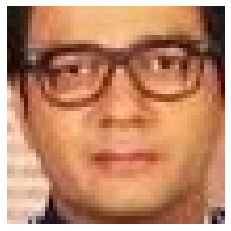

In [ ]:
for n, face_rect in enumerate(detected_faces):
    face = Image.fromarray(image).crop(face_rect)
    plt.subplot(1, len(detected_faces), n+1)
    plt.axis('off')
    plt.imshow(face)

In [ ]:
type(face)

PIL.Image.Image

In [ ]:
def ocr_with_img(img1):
  img = cv2.imread(img1)
  plt.imshow(img)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
  text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
  text2 = pytesseract.image_to_string(threshed, lang="ind")
  #print(text2)
  text = text1[text1.conf != -1]
  lines = text.groupby('block_num')['text'].apply(list)
  conf = text.groupby(['block_num'])['conf'].mean()
  print("lines : \n")
  for i in range(len(lines)):
    print("level", i, ": ", lines.iloc[i])
  
  n_boxes = len(text1['text'])
  for i in range(n_boxes):
      if int(text1['conf'][i]) > 60:
          (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
          img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
  

lines : 

level 0 :  ['ART', 'UHI', 'GOVERNMENT', 'OF', 'INDIA']
level 1 :  ['Name:', 'Kettan', 'Singh', 'Show:', 'Janhit', 'Mein', 'Jaari']
level 2 :  ['Topic:', 'Aadhaat']
level 3 :  ['4444', '5555', '6666', '-', 'HT', 'aga', 'ar', 'eRe']
level 4 :  [' ']


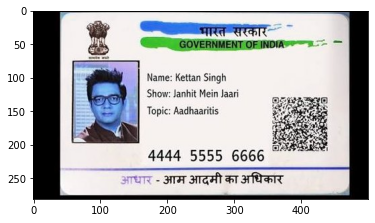

In [ ]:
ocr_with_img("/content/aadhar card.jpeg")

lines : 

level 0 :  ['See', ':', 'ARI', 'AMMAN', '2', 'enue', 'OF', 'TECHNOLOGY']
level 1 :  ['KAAVIYASRI', 'M']
level 2 :  ['ld', 'om)', '=', 'oO', 'nd', '©', 'pe', 'wW']
level 3 :  ['~~', 'A']
level 4 :  [' ', ' ', ' ', ' ']
level 5 :  [' ']
level 6 :  ['  ']
level 7 :  ['B.E.', '-', 'ECE']
level 8 :  [' ']
level 9 :  ['PRINCIPAL']


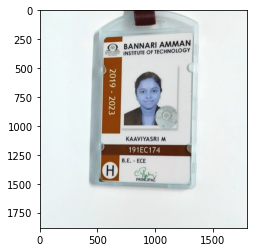

In [ ]:
ocr_with_img("/content/IMG_20220516_215610.jpg")

lines : 

level 0 :  ['<a', '(', ')', 'BANNARI', 'AMMAN']
level 1 :  [' ']


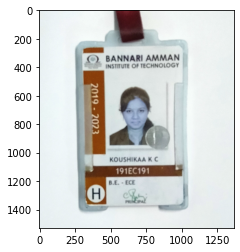

In [ ]:
ocr_with_img("/content/IMG_20220516_203740.jpg")